# Jeepney Fare

In this example, we will build a Simple Linear Regression model to study the linear relationship between **fuel price** and **jeepney fare**.


<img src="jeepney.gif" />

## Step 1: Import the necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Step 2: Create the dataset

In [34]:
x = [1,2,3,4,5]
y = [2,4,5,4,5]

dict = {'fuelprice': x, 'fare': y}

df = pd.DataFrame(dict)
df.head()

,fuelprice,fare
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


## Step 3: Plot the data points

<Axes: xlabel='fuelprice', ylabel='fare'>

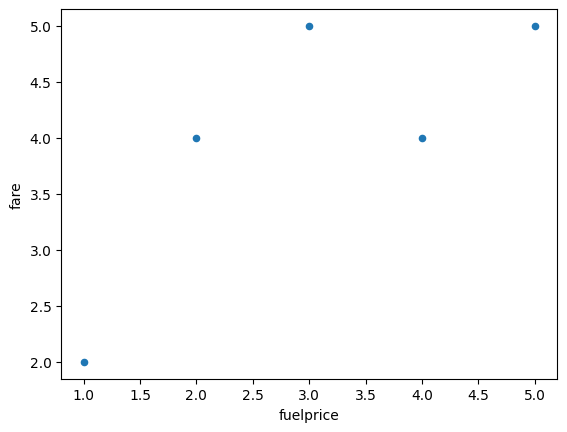

In [35]:
df.plot(x='fuelprice',y='fare',kind='scatter')

## Step 4: Create the model

In [36]:
# Get the all features in the fuelprice column
X = df['fuelprice'].values

# Get the all features in the fare column
y = df['fare'].values

In [37]:
print(X)

[1 2 3 4 5]


In [38]:
print(y)

[2 4 5 4 5]


In [39]:
# Create an instance of linear regression class 
mymodel = LinearRegression()

# Reshape the one dimensional array into a two dimensional array
# X will be have 4 arrays with 1 element
X = X.reshape(-1, 1)

print(X)
# y will be have 4 arrays with 1 element
y = y.reshape(-1, 1)
print(y)

# Train the model 
mymodel.fit(X,y)

# Make prediction
y_pred = mymodel.predict(X)

[[1]
 [2]
 [3]
 [4]
 [5]]
[[2]
 [4]
 [5]
 [4]
 [5]]


## Step 5: Draw the Regression Line

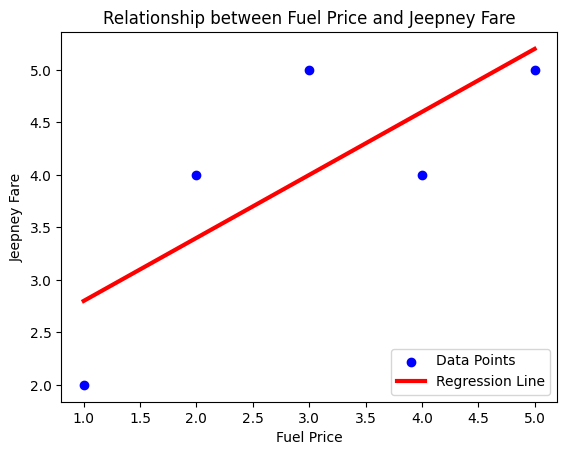

In [40]:
plt.scatter(X, y, color = 'blue', label='Data Points')
plt.plot(X, y_pred, color = 'red', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Fuel Price and Jeepney Fare')
plt.xlabel('Fuel Price')
plt.ylabel('Jeepney Fare')
plt.legend(loc=4)
plt.show()

## Step 6 : Loss function

Compute the Sum of Squared Error (SSE)

SSE represents sum of squares error, also known as residual sum of squares. It is the difference between the observed value and the predicted value.

$$ SSE = \sum(y_i-\hat{y})^2 $$ 

In [41]:
# Reshape the two dimensional array back to a one dimensional array
y = y.reshape(-1)

# Reshape the two dimensional array back to a one dimensional array
y_pred = y_pred.reshape(-1)

df1 = pd.DataFrame({'Actual': y, 'Predicted':y_pred})

In [42]:
sum_of_squared_errors = np.sum(np.square(df1['Actual'] - df1['Predicted']))

Compute the Sum of Squares Total (SST)

TSS represents the total sum of squares. It is the squared values of the dependent variable to the sample mean. In other words, the total sum of squares measures the variation in a sample.

$$ SST = \sum(y_i-\bar{y})^2 $$ 

In [43]:
df1['Actual']


0    2
1    4
2    5
3    4
4    5
Name: Actual, dtype: int64

In [44]:
sum_of_squared_total = np.sum(np.square(df1['Actual'] - df1['Actual'].mean()))
sum_of_squared_total


6.0

Compute $R^2$

$$ R^2 = 1 - \frac{SSE}{SST} $$ 

In [45]:
r2 = 1 - (sum_of_squared_errors / sum_of_squared_total)
r2

0.6000000000000001

In [46]:
from sklearn.metrics import r2_score
# Compute R2 using sklearn
r2_score(y, y_pred)


0.6000000000000001

In [47]:
# Compute R2 using pandas
mymodel.score(X, y)

0.6000000000000001